# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [7]:
# Function to apply custom SVD
def apply_svd_custom(X_train, X_test, n_components):
    # Step 1: Center the data by subtracting the mean
    X_mean = np.mean(X_train, axis=0)
    X_centered = X_train - X_mean

    # Step 2: Calculate the covariance matrix
    covariance_matrix = np.cov(X_centered, rowvar=False)

    # Step 3: Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Step 4: Sort the eigenvalues and eigenvectors
    sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort in descending order
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Step 5: Select the top n_components eigenvectors
    top_eigenvectors = sorted_eigenvectors[:, :n_components]

    # Step 6: Transform the training data
    X_train_svd = np.dot(X_centered, top_eigenvectors)

    # Transform the test data
    X_test_centered = X_test - X_mean
    X_test_svd = np.dot(X_test_centered, top_eigenvectors)

    # Compute singular values from eigenvalues
    singular_values = np.sqrt(sorted_eigenvalues[:n_components])



    # To get the singular vectors (V^T), scale eigenvectors by singular values
    top_singular_vectors = np.dot(top_eigenvectors, np.diag(singular_values))

    return X_train_svd, X_test_svd, top_singular_vectors


## Part 3: Train Logistic Regression and Measure Performance

In [8]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time

## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [4]:
# List of SVD components to try
svd_components = [10, 50, 75, 200, 784]  # Example components to search through

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    # Apply SVD to the training and test sets
    X_train_svd, X_test_svd, top_singular_vectors = apply_svd_custom(X_train, X_test, n_components)

    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

    # Store the results including top singular vectors
    results.append((n_components, accuracy, training_time, top_singular_vectors))


Training models with different levels of SVD preprocessing...
Applying custom SVD with 10 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 10, Accuracy: 0.8035, Training time: 1.4637 seconds
Applying custom SVD with 50 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.9080, Training time: 14.8396 seconds
Applying custom SVD with 75 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 75, Accuracy: 0.9152, Training time: 28.1226 seconds
Applying custom SVD with 200 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 200, Accuracy: 0.9206, Training time: 103.5224 seconds
Applying custom SVD with 784 components...


<ipython-input-2-212d3184ecd0>:29: RuntimeWarning: invalid value encountered in sqrt
  singular_values = np.sqrt(sorted_eigenvalues[:n_components])
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 784, Accuracy: 0.9207, Training time: 604.1886 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


In [ ]:
print("Shape of top singular vectors:", top_singular_vectors.shape)


Shape of top singular vectors: (784, 784)


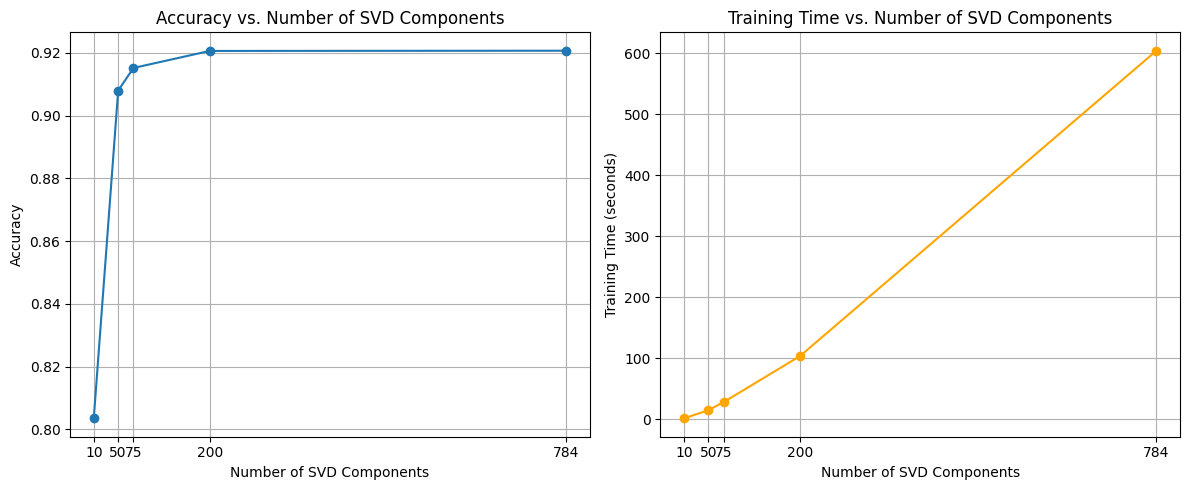

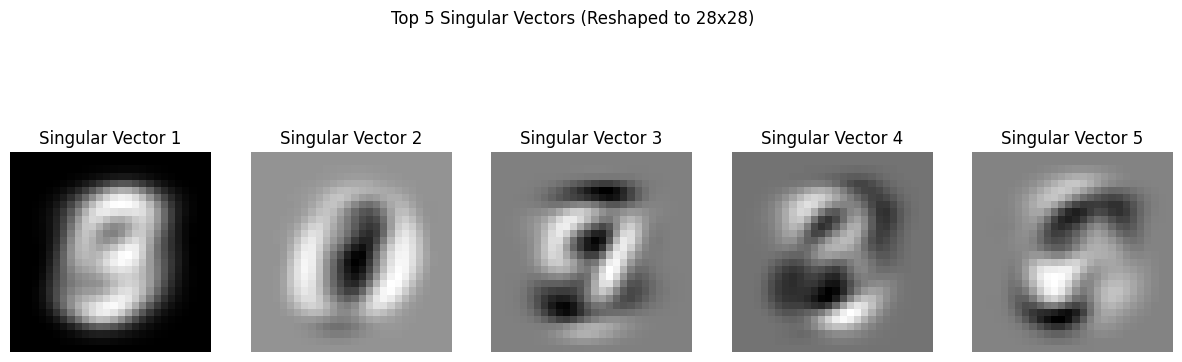

In [11]:
# Extract results for plotting
components, accuracies, training_times, top_vectors = zip(*results)  # Unpack components, accuracy, and training time

# Create a figure for the plots
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(components, accuracies, marker='o')
plt.title('Accuracy vs. Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')
plt.xticks(components)
plt.grid()

# Plot Training Time
plt.subplot(1, 2, 2)
plt.plot(components, training_times, marker='o', color='orange')
plt.title('Training Time vs. Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')
plt.xticks(components)
plt.grid()

plt.tight_layout()
plt.show()

# Now, visualize the top 5 singular vectors
# Access the singular vectors from the last entry in results
_, _, _, top_singular_vectors = results[-1]  # Get the singular vectors for the last entry

# Normalize the singular vectors for better visualization
def normalize(vector):
    vector_min = np.min(vector)
    vector_max = np.max(vector)
    return (vector - vector_min) / (vector_max - vector_min)
#Top Singular Vectors
U, S, Vt = np.linalg.svd(X_train, full_matrices=False)
_, _, Vt = np.linalg.svd(X_train, full_matrices=False)

top_vectors = Vt[:5, :].reshape(5, 28, 28)

plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(top_vectors[i], cmap='gray')
    plt.title(f'Singular Vector {i+1}')
    plt.axis('off')

plt.suptitle('Top 5 Singular Vectors (Reshaped to 28x28)')
plt.show()

## Part 6: Analyze / Conclusion

YOUR ANSWER:

From the visualization that we see in part 5 we see that accuracy increases greatly as we increase the number of SVD components. This increase has decreasing marginal returns after around 100 SVD components where the accuracy starts to level out. The training time increases more than linearly to the SVD components -- more simply there is a greater increase in time then SVD. The top singular vectors displayed show us the principal components and common data structure after the demensionality reduction.